# Geodatenanalyse 2


## Termin 5 - Modul 2

## Datenanalyse mit *xarray*

Ca. 20 Minuten

## Inhalt

- Datenzugriff durch Indizierung
- Analysetools
- Abbildungen
- Komplettbeispiele

In [2]:
import xarray as xr
import numpy as np

**ACHTUNG**

Wenn es beim import von *xarray* eine Fehlermeldung gibt, dann muss das Paket [*xarray*](https://anaconda.org/anaconda/xarray) muss erst installiert werden. Dazu im *Anaconda Prompt* folgendes eingeben:

``conda activate geo`` (bestätigen)

``conda install -c conda-forge xarray dask netCDF4 bottleneck`` (bestätigen)

### Datenzugriff durch Indizierung

In *xarray* erfolgt der Zugriff über eine Mischung aus *labels* und gewöhnlicher Indizierung, wie sie bereits aus *NumPy* oder *Pandas* bekannt ist.

Direktzugriff auf einzelne Daten:

In [23]:
data = xr.open_dataset('data/HadISST1_SST_update.nc')
data

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2, time: 9)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-16T12:00:00 ... 2019-09-16T12:00:00
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time, latitude, longitude) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

In [8]:
data['sst'][::10, ::10, :]

<xarray.DataArray 'sst' (time: 1, latitude: 18, longitude: 360)>
array([[[-1.000000e+03, -1.000000e+03, ..., -1.000000e+03, -1.000000e+03],
        [-1.000000e+03, -1.000000e+03, ..., -1.000000e+03, -1.800000e+00],
        ...,
        [-2.101926e-01, -2.904893e-01, ..., -1.251028e-01, -1.348966e-01],
        [          nan,           nan, ...,           nan,           nan]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-16T12:00:00
  * latitude   (latitude) float32 89.5 79.5 69.5 59.5 ... -60.5 -70.5 -80.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Attributes:
    standard_name:  sea_surface_temperature
    long_name:      sst
    units:          C
    cell_methods:   time: lat: lon: mean

Zugriff über Datenpositionen:

In [19]:
tmp = data.isel(time=8, latitude=5, longitude=3)

Zugriff über Datenwerte:

In [4]:
data.sel(longitude=-179.5, latitude=45.5)

<xarray.Dataset>
Dimensions:    (nv: 2, time: 9)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-16T12:00:00 ... 2019-09-16T12:00:00
    latitude   float32 45.5
    longitude  float32 -179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float32 ...
    sst        (time) float32 ...
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

### Zugriff über Datenbedingungen:

*Beispiel*: Ersetze alle Werte, die unter -100 °C liegen:

In [24]:
data = data.where(data.sst >= -100, other=np.nan)
data.sst.values

array([[[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ..., -1.8, -1.8,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[-1.8, -1.8, -1.

### Konvertierung zu *NumPy*

In [25]:
data.sel(longitude=-179.5, latitude=45.5).sst.values

array([ 6.159567 ,  5.5957103,  5.281234 ,  5.521528 ,  6.477437 ,
        8.29946  , 11.015162 , 13.948002 , 13.403329 ], dtype=float32)

### Analysetools

Es gibt viele eingebaute Tools für das Berechnen von statistischen Werten.

Zum Beispiel rechnen wir hier den Mittelwert über die Zeit (das Jahr 2019) aus:

In [26]:
data.mean('time')

<xarray.Dataset>
Dimensions:    (latitude: 180, longitude: 360, nv: 2)
Coordinates:
  * latitude   (latitude) float32 89.5 88.5 87.5 86.5 ... -87.5 -88.5 -89.5
  * longitude  (longitude) float32 -179.5 -178.5 -177.5 ... 177.5 178.5 179.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (nv, latitude, longitude) float32 5.461e+04 5.461e+04 ... nan nan
    sst        (latitude, longitude) float32 -1.8 -1.8 -1.8 -1.8 ... nan nan nan

Oder aber auch nur für eine Geoposition über die Zeit gemittelt:

In [29]:
data.sel(latitude=48.5, longitude=-8.5).mean('time').sst

<xarray.DataArray 'sst' ()>
array(14.473166, dtype=float32)
Coordinates:
    latitude   float32 48.5
    longitude  float32 -8.5

Vor allem auch als gleitender Durchschnitt über 3 Monate:

In [33]:
data.sel(latitude=48.5, longitude=-8.5).rolling(time=3).mean()

<xarray.Dataset>
Dimensions:    (nv: 2, time: 9)
Coordinates:
  * time       (time) datetime64[ns] 2019-01-16T12:00:00 ... 2019-09-16T12:00:00
    latitude   float32 48.5
    longitude  float32 -8.5
Dimensions without coordinates: nv
Data variables:
    time_bnds  (time, nv) float64 nan nan nan ... 5.463e+04 5.463e+04 5.466e+04
    sst        (time) float64 nan nan 11.83 11.7 12.3 13.54 15.67 17.3 18.06
Attributes:
    Title:                      Monthly version of HadISST sea surface temper...
    description:                HadISST 1.1 monthly average sea surface tempe...
    institution:                Met Office Hadley Centre
    source:                     HadISST
    reference:                  Rayner, N. A., Parker, D. E., Horton, E. B., ...
    Conventions:                CF-1.0
    history:                    8/11/2019 converted to netcdf from pp format
    supplementary_information:  Updates and supplementary information will be...
    comment:                    Data restrictions: for academic research use ...

### Abbildungen

Auf viele Abbildungstypen kann direkt von *xarray* zugegriffen werden:

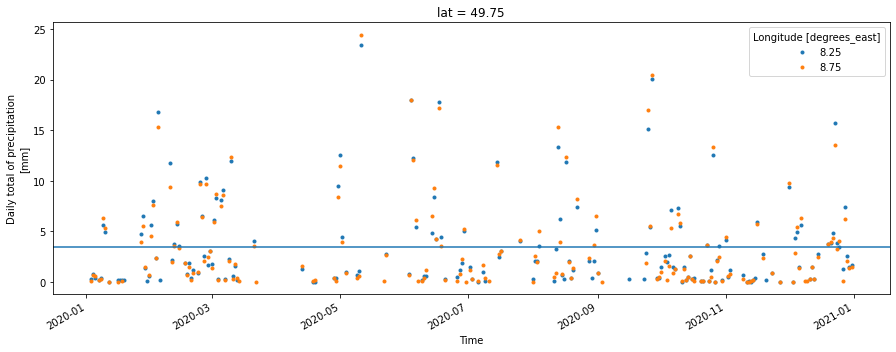

In [34]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = plt.axes()

# Niederschlagsdaten laden ...
rain = xr.open_dataset('data/precip.2020.nc').precip

# Alle Werte mit 0 löschen
rain = rain.where(rain > 0, other=np.nan)

# Niederschlag für das Pixel von Karlsruhe abbilden
p = rain.sel(lat=49.75, lon=[8.25, 8.75]).plot.line(ax=ax, x='time', marker='.', ls='none')

# Was ist der Durchschnitt?
ax.axhline(rain.sel(lat=49.75, lon=8.25).mean('time').values)

plt.show()

Dieses Beispiel zeigt schön die Rasterung der Daten (der weiße Punkt ist Karlsruhe):

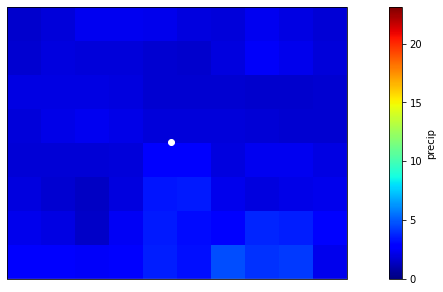

In [11]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(), facecolor='gray')

rain = xr.open_dataset('data/precip.2020.nc').precip

p = rain.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet')

p.axes.set_extent([6, 11, 47, 51])
ax.plot(8.4037, 49.0069, transform=ccrs.Geodetic(), marker='o', c='w')

plt.show()

## Komplettbeispiele für Datenabbildung



### Weltkarte der Seeoberflächentemperatur

Eine Weltkarte der saisonalen Meeresoberflächentemperaturdifferenz für das Jahr 2019 (Daten von [Met Office UK](https://www.metoffice.gov.uk/hadobs/hadisst/data/download.html)):

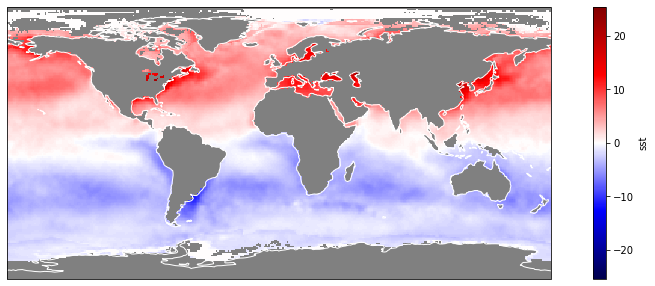

In [12]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(), facecolor='gray')

# Daten öffnen ...
sst = xr.open_dataset('data/HadISST_2019.nc').sst
# fehlende Werte ersetzen
sst = sst.where(sst > -1000, other=np.nan)
sst = sst.where(sst < 1000, other=np.nan)

# Jahreszeitendifferenz (Juli und Januar)
diff_sst = sst.isel(time=6) - sst.isel(time=0)

# Abbildung erzeugen
p = diff_sst.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='seismic')
p.axes.coastlines(color='w')

plt.show()

### Weltkarte des Jahresniederschlags

Eine Weltkarte der durchschnittlichen Jahresniederschlags (Daten von [NOAA](https://psl.noaa.gov/data/gridded/data.cpc.globalprecip.html)):

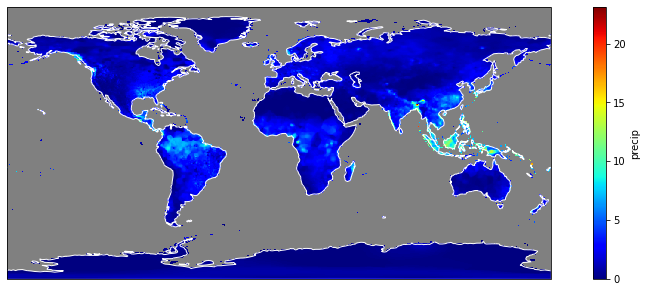

In [13]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))
ax = plt.axes(projection=ccrs.PlateCarree(), facecolor='gray')

rain = xr.open_dataset('data/precip.2020.nc').precip

p = rain.mean('time').plot(ax=ax, transform=ccrs.PlateCarree(), cmap='jet')

p.axes.set_global()

p.axes.coastlines(color='w')

plt.show()

**Hinweis**: Für weitere Funktionalität bitte das [*xarray* Handbuch](https://xarray.pydata.org/) studieren.

## ENDE